Load a Small Dataset

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


Visualize Some Samples

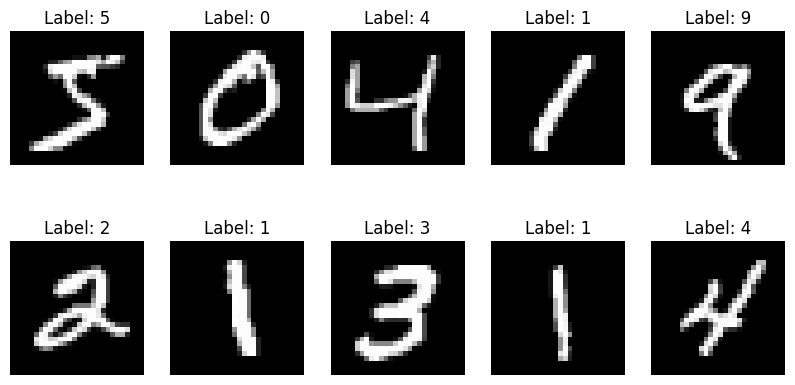

In [3]:
import matplotlib.pyplot as plt

# Plot some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


In [5]:
from tensorflow.keras import layers, models

def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_lenet_model()


C:\Users\3122215002012\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8540 - loss: 0.5189 - val_accuracy: 0.9657 - val_loss: 0.1187
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9636 - loss: 0.1206 - val_accuracy: 0.9772 - val_loss: 0.0820
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0755 - val_accuracy: 0.9817 - val_loss: 0.0680
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0532 - val_accuracy: 0.9827 - val_loss: 0.0620
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9876 - loss: 0.0402 - val_accuracy: 0.9825 - val_loss: 0.0527


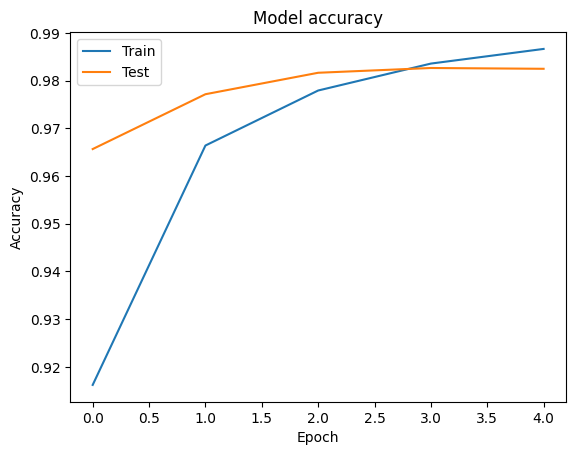

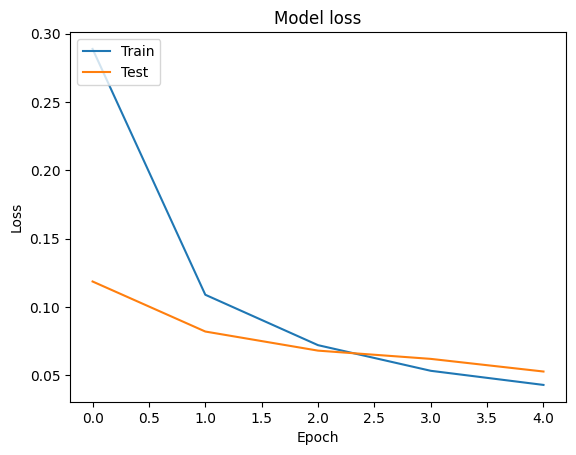

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 0.0584
Test Loss: 0.05120952054858208
Test Accuracy: 0.984000027179718


**Experimenting with Different Hyperparameters**

In [9]:
from tensorflow.keras.optimizers import Adam

def create_lenet_model_with_params(learning_rate=0.001, batch_size=64, num_neurons=84):
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_neurons, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Parameters to experiment with
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
num_neurons_list = [64, 84, 128]

results = []

for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_neurons in num_neurons_list:
            print(f"Training with learning_rate={lr}, batch_size={batch_size}, num_neurons={num_neurons}")
            model = create_lenet_model_with_params(learning_rate=lr, batch_size=batch_size, num_neurons=num_neurons)
            history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.1, verbose=2)
            test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'num_neurons': num_neurons,
                'test_loss': test_loss,
                'test_accuracy': test_accuracy
            })


Training with learning_rate=0.001, batch_size=32, num_neurons=64
Epoch 1/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9283 - loss: 0.2398 - val_accuracy: 0.9720 - val_loss: 0.0939
Epoch 2/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9728 - loss: 0.0928 - val_accuracy: 0.9792 - val_loss: 0.0726
Epoch 3/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9809 - loss: 0.0626 - val_accuracy: 0.9807 - val_loss: 0.0660
Epoch 4/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9847 - loss: 0.0467 - val_accuracy: 0.9833 - val_loss: 0.0641
Epoch 5/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9885 - loss: 0.0371 - val_accuracy: 0.9850 - val_loss: 0.0527
Training with learning_rate=0.001, batch_size=32, num_neurons=84
Epoch 1/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9284 - loss: 0.2378 - val_accuracy: 0.9715 - val_loss: 0.0937
Epoch 2/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9725 - loss: 0.0915 - val_accuracy: 0.9763 - val_loss: 0.0785
Epoch 3/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9809 - loss: 0.0625 - val_accuracy: 

Implement Regularization Techniques

In [10]:
from tensorflow.keras import regularizers

def create_lenet_model_with_dropout_and_l2(dropout_rate=0.5, l2_reg=0.01):
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train with and without Dropout/L2
regularization_results = {}

# Without regularization
print("Training without regularization")
model_no_reg = create_lenet_model_with_params()
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
test_loss_no_reg, test_accuracy_no_reg = model_no_reg.evaluate(x_test, y_test, verbose=0)

# With Dropout and L2
print("Training with Dropout and L2 regularization")
model_reg = create_lenet_model_with_dropout_and_l2()
history_reg = model_reg.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
test_loss_reg, test_accuracy_reg = model_reg.evaluate(x_test, y_test, verbose=0)

regularization_results['no_regularization'] = (test_loss_no_reg, test_accuracy_no_reg)
regularization_results['with_regularization'] = (test_loss_reg, test_accuracy_reg)


Training without regularization
Epoch 1/5
844/844 - 3s - 4ms/step - accuracy: 0.9126 - loss: 0.2933 - val_accuracy: 0.9677 - val_loss: 0.1166
Epoch 2/5
844/844 - 2s - 3ms/step - accuracy: 0.9673 - loss: 0.1075 - val_accuracy: 0.9793 - val_loss: 0.0768
Epoch 3/5
844/844 - 2s - 3ms/step - accuracy: 0.9790 - loss: 0.0687 - val_accuracy: 0.9802 - val_loss: 0.0654
Epoch 4/5
844/844 - 2s - 3ms/step - accuracy: 0.9836 - loss: 0.0515 - val_accuracy: 0.9833 - val_loss: 0.0524
Epoch 5/5
844/844 - 2s - 3ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9828 - val_loss: 0.0575
Training with Dropout and L2 regularization
Epoch 1/5
844/844 - 3s - 4ms/step - accuracy: 0.8587 - loss: 0.8998 - val_accuracy: 0.9395 - val_loss: 0.4919
Epoch 2/5
844/844 - 2s - 3ms/step - accuracy: 0.9230 - loss: 0.5346 - val_accuracy: 0.9507 - val_loss: 0.4247
Epoch 3/5
844/844 - 2s - 3ms/step - accuracy: 0.9383 - loss: 0.4699 - val_accuracy: 0.9543 - val_loss: 0.3964
Epoch 4/5
844/844 - 2s - 3ms/step - accuracy

Plot Training and Validation Accuracy/Loss

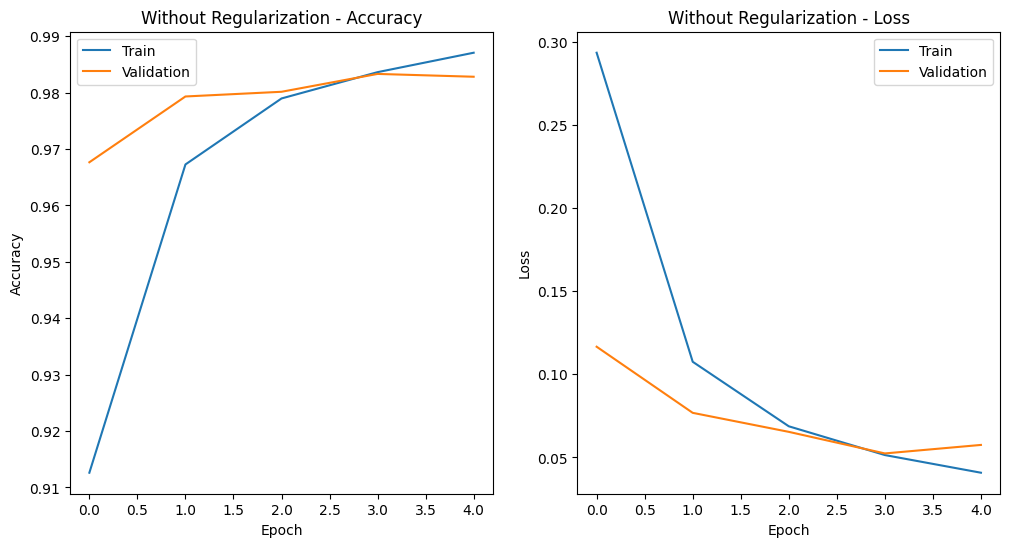

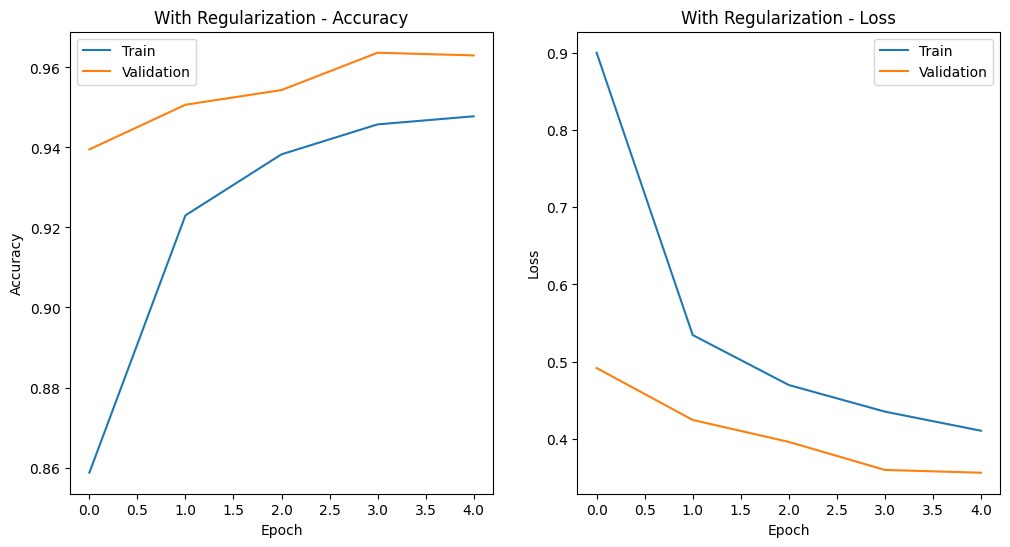

In [11]:
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.show()

plot_history(history_no_reg, 'Without Regularization')
plot_history(history_reg, 'With Regularization')


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


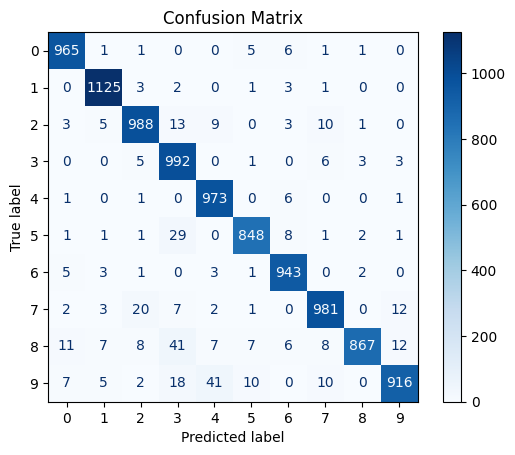

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = model_reg.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
